# TensorFlow Guide

Library's used:

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
layers = tf.keras.layers

Importing of training dataset:

In [13]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_trainFull,y_trainFull),(X_test, y_test) = fashion_mnist
X_train, y_train = X_trainFull[:-5000], y_trainFull[:-5000]
X_valid, y_valid = X_trainFull[-5000:], y_trainFull[-5000:]

# By reading the metadata on the website, there are digits from 0 to 9
# each one representing a class
class_names = ['T-shirt','Trouser','Pullover','Dress','Coat','Sandal',
    'Shirt','Sneaker','Bag','Ankle Boot']

# A thing that's recommended on image is to normalize
# if its black and white each pixel as a number from 0 to 255
# so dividing by the maximum number leaves the values from 0 to 1
X_train = X_train/255.0
X_valid = X_valid/255.0
X_test = X_test/255.0

In [17]:
print(f'first five targets: {y_train[:5]}')
print(f'first data is class: {class_names[y_train[0]]}')

first five targets: [9 0 0 3 0]
first data is class: Ankle Boot


### How to Create a Simple Tensorflow Model
- *Sequential API*
    - Allows for the creation of a model adding layer by layer

In [6]:
tf.random.set_seed(2023)

# Sequential API
model = tf.keras.Sequential(
    [
    layers.Input(shape=[28,28]),
    layers.Flatten(),
    layers.Dense(300, activation='relu'),
    layers.Dense(10, activation='softmax')
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 300)               235500    
                                                                 
 dense_5 (Dense)             (None, 10)                3010      
                                                                 
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


About the loss function we will be using:
- sparse: the class are exclusive, a shoe cant be a coat, so there are no mixes
- categorical: predicting an 8 when we had a 9 is not better than predicting a 8 when it should been a 0, *the distance between numbers dont have meaning*
- crossentropy: measures the error based on a probability of ocurrence of the data point

In [18]:
# Create a compilation of the model so it runs quicker
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# train it generating an history
history = model.fit(X_train, y_train, epochs=30,
    validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4895 - accuracy: 0.8268 - val_loss: 0.4028 - val_accuracy: 0.8516
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3636 - accuracy: 0.8678 - val_loss: 0.3562 - val_accuracy: 0.8708
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3301 - accuracy: 0.8791 - val_loss: 0.3336 - val_accuracy: 0.8800
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3029 - accuracy: 0.8878 - val_loss: 0.3173 - val_accuracy: 0.8812
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2852 - accuracy: 0.8956 - val_loss: 0.3281 - val_accuracy: 0.8840
Epoch 6/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2707 - accuracy: 0.8995 - val_loss: 0.3235 - val_accuracy: 0.8774
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2564 - accuracy: 0.9044 - val_loss: 0.3211 - val_accuracy:

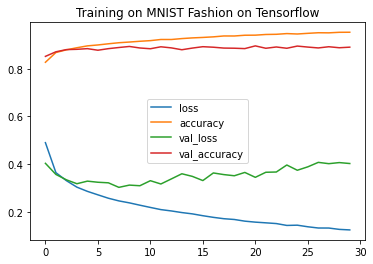

In [29]:
# Because history.history is a dictionary, is very comfy to use pandas
historyDf = pd.DataFrame(history.history)
historyDf.plot()
plt.title('Training on MNIST Fashion on Tensorflow')
plt.show()